# Fonte
https://github.com/MeepMoop/tilecoding

In [1]:
from tilecoding import TileCoder

In [2]:
# number of tile spanning each dimension
tiles_per_dim = [10, 10]
# value limits of each dimension
lims = [(0.0, 10.0), (0.0, 10.0)]
# number of tilings
tilings = 8

In [3]:
T = TileCoder(tiles_per_dim, lims, tilings)

In [4]:
# get active tiles for location (3.6, 7.21)
T[3.6, 7.21]

array([ 80, 201, 322, 443, 565, 697, 807, 928])

In [5]:
# a nearby point, differs from (3.6, 7.21) by 1 tile
T[3.7, 7.21]


array([ 80, 201, 322, 444, 565, 697, 807, 928])

In [6]:
# a slightly farther point, differs from (3.6, 7.21) by 5 tiles
T[4.1, 7.10]

array([ 81, 202, 323, 444, 565, 686, 807, 928])

In [7]:
# a much farther point, no tiles in common with (3.6, 7.21)
T[6.6, 9.14]

array([105, 226, 347, 468, 590, 722, 832, 953])

In [8]:
import numpy as np
from tilecoding import TileCoder

# tile coder tiling dimensions, value limits, number of tilings
tiles_per_dim = [8, 8]
lims = [(0.0, 2.0 * np.pi), (0.0, 2.0 * np.pi)]
tilings = 8

# create tile coder
T = TileCoder(tiles_per_dim, lims, tilings)

In [9]:
# target function with gaussian noise
def target_fn(x, y):
  return np.sin(x) + np.cos(y) + 0.1 * np.random.randn()

In [10]:
# linear function weight vector
w = np.zeros(T.n_tiles)

In [11]:
# step size for SGD
alpha = 0.1 / tilings

# learn from 10,000 samples
for i in range(10000):
   # get noisy sample from target function at random location
  x, y = 2.0 * np.pi * np.random.rand(2)
  target = target_fn(x, y)
  # get prediction from active tiles at that location
  tiles = T[x, y]
  pred = w[tiles].sum()
  # update weights with SGD
  w[tiles] += alpha * (target - pred)

In [12]:
# check approximate value at (2.5, 3.1)
tiles = T[2.5, 3.1]
w[tiles].sum()

-0.42040402041131864

In [13]:
# compare to true value at (2.5, 3.1)
np.sin(2.5) + np.cos(3.1)

-0.40066300616932293

<ipython-input-14-ae5f996aa467>:20: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


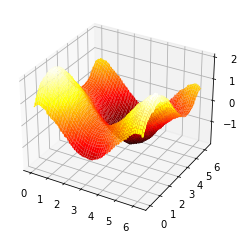

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# resolution
res = 200

# (x, y) space to evaluate
x = np.arange(0.0, 2.0 * np.pi, 2.0 * np.pi / res)
y = np.arange(0.0, 2.0 * np.pi, 2.0 * np.pi / res)

# map the function across the above space
z = np.zeros([len(x), len(y)])
for i in range(len(x)):
  for j in range(len(y)):
    tiles = T[x[i], y[j]]
    z[i, j] = w[tiles].sum()

# plot function
fig = plt.figure()
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(x, y)
surf = ax.plot_surface(X, Y, z, cmap=plt.get_cmap('hot'))
plt.show()